In [ ]:
## Pymaceuticals Instructions

#While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

#As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

#To do this you are tasked with:

#* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
#* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
#* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
#* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
#* Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.

#As final considerations:

#* You must use the Pandas Library and the Jupyter Notebook.
#* You must use the Matplotlib library.
#* You must include a written description of three observable trends based on the data.
#* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
#* Your scatter plots must include [error bars](https://en.wikipedia.org/wiki/Error_bar). This will allow the company to account for variability between mice. You may want to look into [`pandas.DataFrame.sem`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sem.html) for ideas on how to calculate this.
#* Remember when making your plots to consider aesthetics!
#  * Your legends should not be overlaid on top of any data.
#  * Your bar graph should indicate tumor growth as red and tumor reduction as green.
#    It should also include a label with the percentage change for each bar. You may want to consult this [tutorial](http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/) for relevant code snippets.
#* See [Starter Workbook](Pymaceuticals/pymaceuticals_starter.ipynb) for a reference on expected format. (Note: For this example, you are not required to match the tables or data frames included. Your only goal is to build the scatter plots and bar graphs. Consider the tables to be potential clues, but feel free to approach this problem, however, you like.)

In [2]:
# Dependencies and Setup
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [16]:
# File to Load: Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinicaltrial_data = pd.read_csv("data/clinicaltrial_data.csv")


In [17]:
# Combine the data into a single dataset
mousedrug_clinicaltrial_combine = pd.merge(clinicaltrial_data, mouse_drug_data,how='outer', on="Mouse ID")

# Display the data table for preview
mousedrug_clinicaltrial_combine.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [18]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combine_group_mean = mousedrug_clinicaltrial_combine.groupby(["Drug","Timepoint"]).mean()
combine_group_mean.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_response_mean_df = pd.DataFrame(combine_group_mean)

# Preview DataFrame
tumor_response_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [19]:
mouse_clinical_combine.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


In [24]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combine_sem = mousedrug_clinicaltrial_combine.groupby(["Drug","Timepoint"]).sem()
combine_sem.reset_index(level = None, inplace = True)

In [26]:
# Convert to DataFrame
tumor_volume_sem_df = pd.DataFrame(combine_sem)

# Preview DataFrame 
tumor_volume_sem_df.head()

,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [27]:
combine_sem.describe()

,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
count,100.000000,100.000000,0.0,100.000000
mean,22.500000,0.190120,NaN,0.691003
std,14.433757,0.104712,NaN,0.428934
min,0.000000,0.000000,NaN,0.000000
25%,10.000000,0.115261,NaN,0.359038
50%,22.500000,0.183529,NaN,0.705595
75%,35.000000,0.266561,NaN,0.999683
max,45.000000,0.433903,NaN,1.888586


In [97]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table = tumor_response_mean_df.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pivot_table.reset_index(level = None, inplace = True)

In [98]:
# Preview that Reformatting worked
pivot_table.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [109]:
#Table for 4 drugs: Capomulin, Infubinol, Ketapril, Placebo
table_Capomulin_Infubinol_Ketapril_Placebo = pivot_table[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
table_Capomulin_Infubinol_Ketapril_Placebo.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


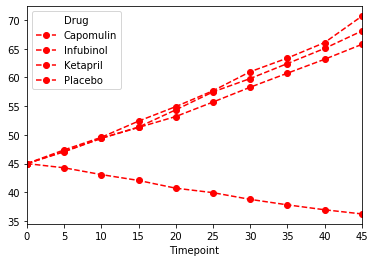

In [147]:
table_Capomulin_Infubinol_Ketapril_Placebo.plot(kind='line', x="Timepoint", y=["Capomulin", "Infubinol", "Ketapril", "Placebo"], linestyle='--', color='red', marker='o');

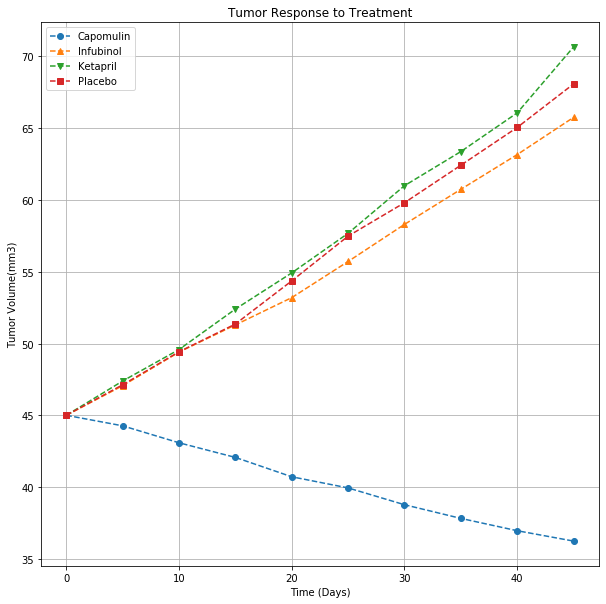

In [177]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10,10))
plt.errorbar(x=table_Capomulin_Infubinol_Ketapril_Placebo['Timepoint'],y=table_Capomulin_Infubinol_Ketapril_Placebo['Capomulin'], linestyle="--", yerr=None, fmt='o', label="Capomulin")
plt.errorbar(x=table_Capomulin_Infubinol_Ketapril_Placebo['Timepoint'],y=table_Capomulin_Infubinol_Ketapril_Placebo['Infubinol'], linestyle="--", yerr=None, fmt='^', label="Infubinol")
plt.errorbar(x=table_Capomulin_Infubinol_Ketapril_Placebo['Timepoint'],y=table_Capomulin_Infubinol_Ketapril_Placebo['Ketapril'], linestyle="--", yerr=None, fmt='v', label="Ketapril")
plt.errorbar(x=table_Capomulin_Infubinol_Ketapril_Placebo['Timepoint'],y=table_Capomulin_Infubinol_Ketapril_Placebo['Placebo'], linestyle="--", yerr=None, fmt='s', label="Placebo")

# Show the Figure
plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')
plt.legend()
plt.grid()
plt.show()

In [201]:
# Save the Figure
plt.savefig("../TumorRespnse.png")

<Figure size 432x288 with 0 Axes>

## Metastatic Response to Treatment

In [174]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combine_group_mean_met= mouse_clinical_combine.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame
met_response_mean_df = pd.DataFrame(combine_group_mean_met["Metastatic Sites"])

# Preview DataFrame 
met_response_mean_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [137]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
combine_group_met_sem = mouse_clinical_combine.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
met_response_sem_df = pd.DataFrame(combine_sem)

# Preview DataFrame
met_response_sem_df.head()

Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731

In [144]:
# Minor Data Munging to Re-Format the Data Frames
met_response_mean_df.reset_index(level = None, inplace = True)
met_response_mean_df2 = pd.DataFrame(combine_group_mean)

pivot_table_met = met_response_mean_df2.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
pivot_table_met.reset_index(level = None, inplace = True)

#Preview the formatted table
pivot_table_met.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [204]:
#Table for 4 drugs: Capomulin, Infubinol, Ketapril, Placebo
met_table_Capomulin_Infubinol_Ketapril_Placebo = pivot_table_met[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
met_table_Capomulin_Infubinol_Ketapril_Placebo.head()


Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316


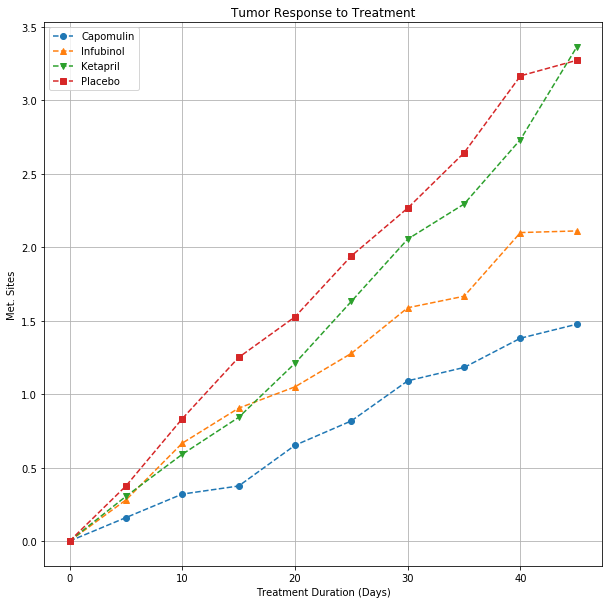

In [187]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10,10))

plt.errorbar(x=pivot_table_met['Timepoint'],y=met_table_Capomulin_Infubinol_Ketapril_Placebo['Capomulin'], linestyle="--", yerr=None, fmt='o', label="Capomulin")
plt.errorbar(x=pivot_table_met['Timepoint'],y=met_table_Capomulin_Infubinol_Ketapril_Placebo['Infubinol'], linestyle="--", yerr=None, fmt='^', label="Infubinol")
plt.errorbar(x=pivot_table_met['Timepoint'],y=met_table_Capomulin_Infubinol_Ketapril_Placebo['Ketapril'], linestyle="--", yerr=None, fmt='v', label="Ketapril")
plt.errorbar(x=pivot_table_met['Timepoint'],y=met_table_Capomulin_Infubinol_Ketapril_Placebo['Placebo'], linestyle="--", yerr=None, fmt='s', label="Placebo")

# Show the Figure
plt.ylabel('Met. Sites')
plt.xlabel('Treatment Duration (Days)')
plt.title('Tumor Response to Treatment')
plt.legend()
plt.grid()
plt.show()

In [202]:
# Save the Figure
plt.savefig("../MetRespnse.png")

<Figure size 432x288 with 0 Axes>

## Survival Rates

In [188]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micecount=mouse_clinical_combine.groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
micecount_df=pd.DataFrame(micecount["Mouse ID"])
micecount_df.reset_index(inplace=True)

# Preview DataFrame
micecount_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [274]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table_mice = micecount_df.pivot(index ="Timepoint", columns = 'Drug', values = "Mouse ID")
pivot_table_mice.reset_index(level = None, inplace = True)

# Preview the Data Frame
pivot_table_mice.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [275]:
#Table for 4 drugs: Capomulin, Infubinol, Ketapril, Placebo
mice_table_Capomulin_Infubinol_Ketapril_Placebo = pivot_table_mice[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
mice_table_Capomulin_Infubinol_Ketapril_Placebo.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19


In [285]:
#Convert to % (for survival rate)
survival_Capomulin_Infubinol_Ketapril_Placebo_df = mice_table_fourdrugs.astype(float)
survival_Capomulin_Infubinol_Ketapril_Placebo_df["Capomulin_percent"]=survival_fourdrugs_df["Capomulin"]/survival_fourdrugs_df["Capomulin"].iloc[0] * 100
survival_Capomulin_Infubinol_Ketapril_Placebo_df["Infubinol_percent"]=survival_fourdrugs_df["Infubinol"]/survival_fourdrugs_df["Infubinol"].iloc[0] * 100
survival_Capomulin_Infubinol_Ketapril_Placebo_df["Ketapril_percent"]=survival_fourdrugs_df["Ketapril"]/survival_fourdrugs_df["Ketapril"].iloc[0] * 100
survival_Capomulin_Infubinol_Ketapril_Placebo_df["Placebo_percent"]=survival_fourdrugs_df["Placebo"]/survival_fourdrugs_df["Placebo"].iloc[0] * 100
survival_Capomulin_Infubinol_Ketapril_Placebo_df

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo,Capomulin_percent,Infubinol_percent,Ketapril_percent,Placebo_percent
0,0.0,25.0,25.0,25.0,25.0,100.0,100.0,100.0,100.0
1,5.0,25.0,25.0,23.0,24.0,100.0,100.0,92.0,96.0
2,10.0,25.0,21.0,22.0,24.0,100.0,84.0,88.0,96.0
3,15.0,24.0,21.0,19.0,20.0,96.0,84.0,76.0,80.0
4,20.0,23.0,20.0,19.0,19.0,92.0,80.0,76.0,76.0
5,25.0,22.0,18.0,19.0,17.0,88.0,72.0,76.0,68.0
6,30.0,22.0,17.0,18.0,15.0,88.0,68.0,72.0,60.0
7,35.0,22.0,12.0,17.0,14.0,88.0,48.0,68.0,56.0
8,40.0,21.0,10.0,15.0,12.0,84.0,40.0,60.0,48.0
9,45.0,21.0,9.0,11.0,11.0,84.0,36.0,44.0,44.0


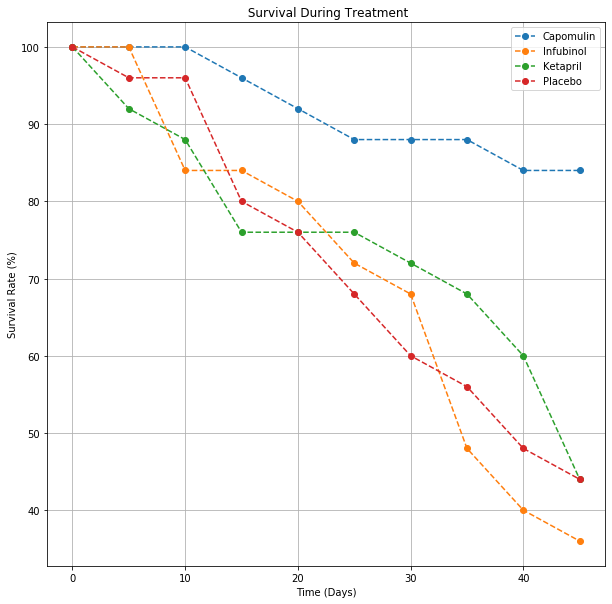

In [199]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (10, 10))

plt.errorbar(x=survival_fourdrugs_df ['Timepoint'],y=survival_fourdrugs_df['Capomulin_percent'], linestyle="--", fmt='o', label="Capomulin")
plt.errorbar(x=survival_fourdrugs_df['Timepoint'],y=survival_fourdrugs_df['Infubinol_percent'], linestyle="--", fmt='o', label="Infubinol")
plt.errorbar(x=survival_fourdrugs_df['Timepoint'],y=survival_fourdrugs_df['Ketapril_percent'], linestyle="--",fmt='o', label="Ketapril")
plt.errorbar(x=survival_fourdrugs_df['Timepoint'],y=survival_fourdrugs_df['Placebo_percent'], linestyle="--", fmt='o', label="Placebo")

# Show the Figure
plt.ylabel("Survival Rate (%)")
plt.xlabel('Time (Days)')
plt.title(' Survival During Treatment')
plt.grid()
plt.legend()       
plt.show()


In [200]:
# Save the Figure
plt.savefig("../SurvivalRespnse.png")

<Figure size 432x288 with 0 Axes>

## Summary Bar Graph

In [245]:
# Calculate the percent changes for each drug
Capomulin_percentchange=(pivot_table["Capomulin"].iloc[9]-pivot_table["Capomulin"].iloc[0])/pivot_table["Capomulin"].iloc[0]*100

# Display the data to confirm
Capomulin_percentchange

-19.475302667894155

In [261]:
# Calculate the percent changes for each drug
Ceftamin_percentchange=(pivot_table["Ceftamin"].iloc[9]-pivot_table["Ceftamin"].iloc[0])/pivot_table["Ceftamin"].iloc[0]*100

# Display the data to confirm
Ceftamin_percentchange

42.516491855897414

In [249]:
# Calculate the percent changes for each drug
Infubinol_percentchange=(pivot_table["Infubinol"].iloc[9]-pivot_table["Infubinol"].iloc[0])/pivot_table["Infubinol"].iloc[0]*100

# Display the data to confirm
Infubinol_percentchange

46.12347172785184

In [222]:
# Calculate the percent changes for each drug
Ketapril_percentchange=(pivot_table["Ketapril"].iloc[9]-pivot_table["Ketapril"].iloc[0])/pivot_table["Ketapril"].iloc[0]*100

# Display the data to confirm
Ketapril_percentchange

57.02879468660604

In [250]:
# Calculate the percent changes for each drug
Naftisol_percentchange=(pivot_table["Naftisol"].iloc[9]-pivot_table["Naftisol"].iloc[0])/pivot_table["Naftisol"].iloc[0]*100

# Display the data to confirm
Naftisol_percentchange

53.923347134769195

In [253]:
# Calculate the percent changes for each drug
Placebo_percentchange=(pivot_table["Placebo"].iloc[9]-pivot_table["Placebo"].iloc[0])/pivot_table["Placebo"].iloc[0]*100

# Display the data to confirm
Placebo_percentchange

51.29796048315153

In [260]:
# Calculate the percent changes for each drug
Propriva_percentchange=(pivot_table["Propriva"].iloc[9]-pivot_table["Propriva"].iloc[0])/pivot_table["Propriva"].iloc[0]*100

# Display the data to confirm
Propriva_percentchange

47.24117486320634

In [255]:
# Calculate the percent changes for each drug
Ramicane_percentchange=(pivot_table["Ramicane"].iloc[9]-pivot_table["Ramicane"].iloc[0])/pivot_table["Ramicane"].iloc[0]*100

# Display the data to confirm
Ramicane_percentchange

-22.32090046276666

In [257]:
# Calculate the percent changes for each drug
Stelasyn_percentchange=(pivot_table["Stelasyn"].iloc[9]-pivot_table["Stelasyn"].iloc[0])/pivot_table["Stelasyn"].iloc[0]*100

# Display the data to confirm
Stelasyn_percentchange

52.085134287898995

In [258]:
# Calculate the percent changes for each drug
Zoniferol_percentchange=(pivot_table["Zoniferol"].iloc[9]-pivot_table["Zoniferol"].iloc[0])/pivot_table["Zoniferol"].iloc[0]*100

# Display the data to confirm
Zoniferol_percentchange

46.57975086509522

In [262]:
# Store all Relevant Percent Changes into a Tuple
percent_tuple = {'Capomulin': Capomulin_percentchange, 
                 'Ceftamin': Ceftamin_percentchange,
                 'Infubinol': Infubinol_percentchange, 
                 'Ketapril': Ketapril_percentchange, 
                 'Naftisol': Naftisol_percentchange,
                 'Placebo': Placebo_percentchange,
                 'Propriva': Propriva_percentchange,
                 'Ramicane': Ramicane_percentchange,
                 'Stelasyn': Stelasyn_percentchange,
                 'Zoniferol': Zoniferol_percentchange,
                }
percentchange_tumorvolume = pd.Series(percent_tuple)

percentchange_tumorvolume

Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

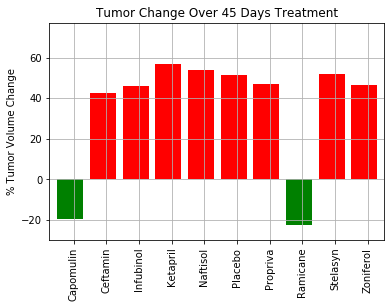

In [287]:
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls

summary_bar = plt.subplot()
x_axis = np.arange(0, len(testdrugs))

tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.5)
plt.xticks(tick_locations, testdrugs, rotation=90)

colors = []
for value in percentchange_tumorvolume:
    if value >= 0 :
        colors.append('r')
    else:
        colors.append('g')
        

percent_change = summary_bar.bar(x_axis, percentchange_tumorvolume, color=colors, align="edge")


plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.25, len(testdrugs))
plt.ylim(-30, max(percentchange_tumorvolume) + 20)
plt.grid()

plt.show()

In [265]:
# Save the Figure
plt.savefig("../SummaryGraph.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
# Observations: 
# 1. Capomulin is reducing tumor size by -19.475303.
# 2. Survival rates of mice under Capomulin is also higher compared to the other drugs.
# 3. Compared to mice treated with other drugs, mice treated with Capomulin show the smallest spreading of cancer. 